In [91]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

original_df = pd.read_csv("datasets/raw_data/cardio_train/cardio_train.csv",delimiter=';')
# original_df = pd.read_csv("data_generation/output_generator/cardio_train/preprocessed_data.csv")
synthetic_df = pd.read_csv("data_generation/output_generator/cardio_train/bgm/5_50/seed_3/raw_gen_data.csv")

original_df.drop(columns=['id'],axis=1, inplace=True)
# synthetic_df.drop(columns=['id'],axis=1, inplace=True)

# original_df = original_df.loc[:10000]
# synthetic_df = synthetic_df.loc[:10000]

In [93]:
synthetic_df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,15076,2,181,54.35,60,802,3,3,0,0,0,1
1,20586,2,158,84.30,1205,802,3,3,0,0,0,1
2,19672,2,175,62.30,1205,802,3,3,0,0,0,0


In [96]:
synthetic_df['gluc'].value_counts()

gluc
3    56000
Name: count, dtype: int64

In [107]:
# Obtain feature distributions
feat_distributions = []
for i in range(original_df.shape[1]):
    values = original_df.iloc[:, i].unique()
    no_nan_values = values[~pd.isnull(values)]
    if no_nan_values.size <= 2 and np.all(np.sort(no_nan_values).astype(int) ==
                                            np.array(range(no_nan_values.min().astype(int),
                                                            no_nan_values.min().astype(int) + len(no_nan_values)))):
        feat_distributions.append(('bernoulli', 1))
    elif np.amin(np.equal(np.mod(no_nan_values, 1), 0)):
        # Check if values are floats but don't have decimals and transform to int. They are floats because of NaNs
        if no_nan_values.dtype == 'float64':
            no_nan_values = no_nan_values.astype(int)
        if np.unique(no_nan_values).size < 50 and np.amin(no_nan_values) == 0:
            feat_distributions.append(('categorical', (np.max(no_nan_values) + 1).astype(int)))
        else:
            feat_distributions.append(('gaussian', 2))
    else:
        feat_distributions.append(('gaussian', 2))
# data_manager.set_feat_distributions(feat_distributions)

# # Normalize, impute data
# # Necessary to impute before normalization because of the categorical variables treated as gaussian.
# data_manager.norm_df = data_manager.transform_data(df)
# data_manager.imp_norm_df = data_manager.impute_data(data_manager.norm_df)

In [ ]:
original_df['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [ ]:
original_df['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [78]:
original_df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,0,1,0,0,1,0


In [111]:
original_df['gluc'].value_counts()

gluc
0    59479
2     5331
1     5190
Name: count, dtype: int64

In [110]:
original_df['gluc'] = original_df['gluc'].map({1: 0, 2: 1, 3: 2})


In [112]:
print(np.array(['<=50K', '>50K']))

['<=50K' '>50K']


In [108]:
feat_distributions

[('gaussian', 2),
 ('bernoulli', 1),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('bernoulli', 1),
 ('bernoulli', 1),
 ('bernoulli', 1),
 ('bernoulli', 1)]

In [76]:
[('gaussian', 2),
 ('bernoulli', 1),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('categorical', 3),
 ('categorical', 3),
 ('bernoulli', 1),
 ('bernoulli', 1),
 ('bernoulli', 1),
 ('bernoulli', 1)]

[('gaussian', 2),
 ('bernoulli', 1),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('gaussian', 2),
 ('categorical', 3),
 ('gaussian', 2),
 ('bernoulli', 1),
 ('bernoulli', 1),
 ('bernoulli', 1),
 ('bernoulli', 1)]

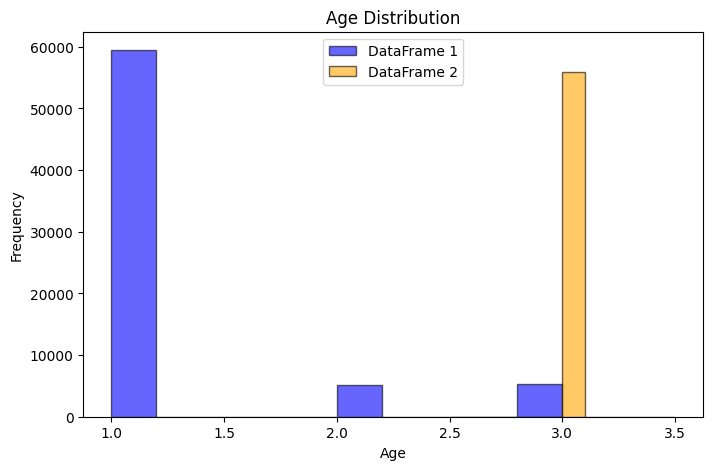

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting with Matplotlib
plt.figure(figsize=(8, 5))
plt.hist(original_df['gluc'], bins=10, color='blue', alpha=0.6, label='DataFrame 1', edgecolor='black')
plt.hist(synthetic_df['gluc'], bins=10, color='orange', alpha=0.6, label='DataFrame 2', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

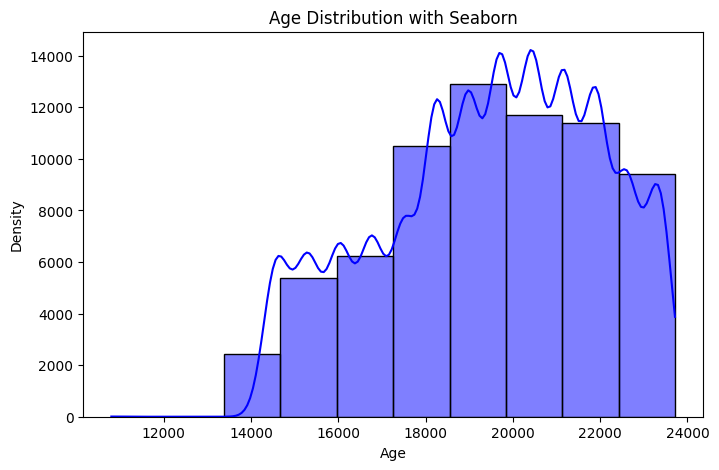

In [24]:
# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(original_df['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution with Seaborn')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

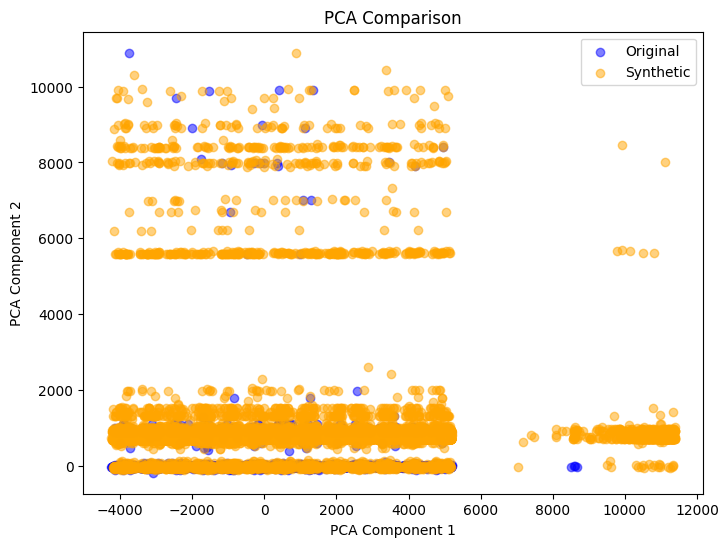

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def pca_comparison(original_df, synthetic_df, n_components=2):
    """
    Perform PCA and compare the original and synthetic datasets.
    
    Parameters:
        original_df (pd.DataFrame): Original dataset.
        synthetic_df (pd.DataFrame): Synthetic dataset.
        n_components (int): Number of PCA components for dimensionality reduction.
    """
    # Ensure both datasets have the same columns
    if not original_df.columns.equals(synthetic_df.columns):
        raise ValueError("Original and synthetic datasets must have the same columns.")
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    original_pca = pca.fit_transform(original_df)
    synthetic_pca = pca.transform(synthetic_df)
    
    # Plot PCA results
    plt.figure(figsize=(8, 6))
    plt.scatter(original_pca[:, 0], original_pca[:, 1], alpha=0.5, label='Original', c='blue')
    plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], alpha=0.5, label='Synthetic', c='orange')
    plt.title('PCA Comparison')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Example usage:
# Assuming original_data and synthetic_data are pandas DataFrames
pca_comparison(original_df, synthetic_df)


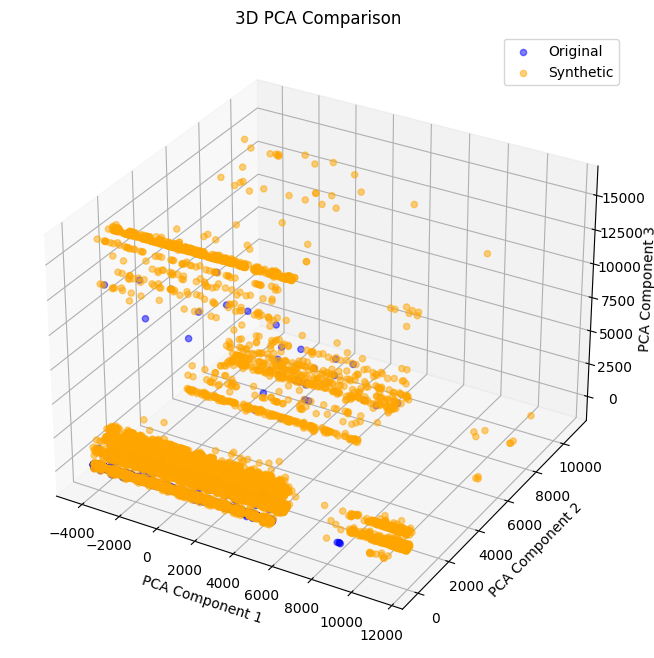

In [59]:
from mpl_toolkits.mplot3d import Axes3D

def pca_3d_comparison(original_df, synthetic_df):
    # Ensure both datasets have the same columns
    if not original_df.columns.equals(synthetic_df.columns):
        raise ValueError("Original and synthetic datasets must have the same columns.")
    
    # Apply PCA
    pca = PCA(n_components=3)
    original_pca = pca.fit_transform(original_df)
    synthetic_pca = pca.transform(synthetic_df)
    
    # Plot 3D PCA results
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(original_pca[:, 0], original_pca[:, 1], original_pca[:, 2], alpha=0.5, label='Original', c='blue')
    ax.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], synthetic_pca[:, 2], alpha=0.5, label='Synthetic', c='orange')
    ax.set_title('3D PCA Comparison')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend()
    plt.show()

# Example usage
pca_3d_comparison(original_df, synthetic_df)


In [5]:
from scipy.stats import ks_2samp

# Assuming `original` and `synthetic` are pandas DataFrames with the same columns
def ks_test(original, synthetic):
    ks_results = {}
    for column in original.columns:
        if original[column].dtype in ['int64', 'float64']:
            stat, p_value = ks_2samp(original[column], synthetic[column])
            ks_results[column] = {"KS Statistic": stat, "p-value": p_value}
    return ks_results

# Example usage
ks_results = ks_test(original_df, synthetic_df)
print(ks_results)


{'id': {'KS Statistic': 0.7005142857142858, 'p-value': 0.0}, 'age': {'KS Statistic': 0.09495357142857141, 'p-value': 1.3912326958337171e-244}, 'gender': {'KS Statistic': 0.00039285714285708373, 'p-value': 1.0}, 'height': {'KS Statistic': 0.14875000000000005, 'p-value': 0.0}, 'weight': {'KS Statistic': 0.30148214285714287, 'p-value': 0.0}, 'ap_hi': {'KS Statistic': 0.7253892857142857, 'p-value': 0.0}, 'ap_lo': {'KS Statistic': 0.9712321428571429, 'p-value': 0.0}, 'cholesterol': {'KS Statistic': 0.7497714285714285, 'p-value': 0.0}, 'gluc': {'KS Statistic': 0.9238428571428572, 'p-value': 0.0}, 'smoke': {'KS Statistic': 0.003282142857142789, 'p-value': 0.8897793002114854}, 'alco': {'KS Statistic': 0.0028535714285714553, 'p-value': 0.961153249516954}, 'active': {'KS Statistic': 0.8037285714285715, 'p-value': 0.0}, 'cardio': {'KS Statistic': 0.00024642857142853636, 'p-value': 1.0}}


In [52]:
from scipy.stats import spearmanr
import pandas as pd

def compute_spearman_fidelity(original_df, synthetic_df):
    """
    Compute Spearman correlation between original and synthetic datasets.
    
    Parameters:
        original_df (pd.DataFrame): Original dataset.
        synthetic_df (pd.DataFrame): Synthetic dataset.
    
    Returns:
        pd.DataFrame: Spearman correlation and p-value for each feature.
    """
    if not original_df.columns.equals(synthetic_df.columns):
        raise ValueError("Original and synthetic datasets must have the same columns.")
    
    results = []
    for column in original_df.columns:
        if original_df[column].dtype in ['float64', 'int64']:  # Numerical columns only
            corr, p_value = spearmanr(original_df[column], synthetic_df[column])
            results.append({"Feature": column, "Spearman Correlation": corr, "p-value": p_value})
    
    return pd.DataFrame(results)

# Example usage
spearman_results = compute_spearman_fidelity(original_df, synthetic_df)
print(spearman_results)


Column:  age
Column:  gender
Column:  height
Column:  weight
Column:  ap_hi
Column:  ap_lo
Column:  cholesterol
Column:  gluc
Column:  smoke
Column:  alco
Column:  active
Column:  cardio
        Feature  Spearman Correlation   p-value
0           age              0.003680  0.712866
1        gender             -0.005517  0.581201
2        height             -0.009788  0.327701
3        weight              0.006016  0.547465
4         ap_hi              0.016090  0.107623
5         ap_lo             -0.001752  0.860957
6   cholesterol              0.005508  0.581795
7          gluc                   NaN       NaN
8         smoke             -0.005186  0.604070
9          alco             -0.001608  0.872267
10       active                   NaN       NaN
11       cardio              0.009853  0.324481


/home/moses/vnenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [53]:
average_correlation = spearman_results["Spearman Correlation"].mean()
print(f"Average Spearman Correlation (Fidelity Score): {average_correlation}")


Average Spearman Correlation (Fidelity Score): 0.0017297414156305737
